COVID-19

In [9]:
import numpy as np

def simulate_tests(p, k, N, num_simulations=1000):
    # Generate infected samples for all simulations at once
    infected = np.random.choice([0, 1], p=[1 - p, p], size=(num_simulations, N))

    total_tests = 0
    for sim in range(num_simulations):
        mixed_batches = infected[sim].reshape(-1, k)  # Reshape into batches
        num_batches = mixed_batches.shape[0]  # Calculate number of batches
        total_tests += num_batches  # Count initial batch tests

        # Count retests for positive batches
        total_tests += np.sum(np.sum(mixed_batches, axis=1) > 0)

    return total_tests / num_simulations

# Define range of p values
p_values = [10**(-i) for i in range(1, 5)]

# Define 5 different batch sizes to test
batch_sizes = [10, 15, 25, 50]

# Total number of samples
total_samples = int(1e6)  # 1 million samples

# Perform simulation for 5 batch sizes per p value
for p in p_values:
    print(f"For p = {p}:")
    for k in batch_sizes:
        expected_tests = simulate_tests(p, k, total_samples)
        print(f"Batch size k = {k}: {expected_tests:.2f} expected tests.")
    print()



For p = 0.1:
Batch size k = 100: 1009975.00 expected tests.
Batch size k = 250: 1004000.00 expected tests.
Batch size k = 500: 1002000.00 expected tests.
Batch size k = 1000: 1001000.00 expected tests.
Batch size k = 2000: 1000500.00 expected tests.

For p = 0.01:
Batch size k = 100: 644215.60 expected tests.
Batch size k = 250: 923101.25 expected tests.
Batch size k = 500: 995486.00 expected tests.
Batch size k = 1000: 1000961.00 expected tests.
Batch size k = 2000: 1000500.00 expected tests.

For p = 0.001:
Batch size k = 100: 105260.30 expected tests.
Batch size k = 250: 225696.25 expected tests.
Batch size k = 500: 395894.00 expected tests.
Batch size k = 1000: 633273.00 expected tests.
Batch size k = 2000: 865600.00 expected tests.

For p = 0.0001:
Batch size k = 100: 19907.80 expected tests.
Batch size k = 250: 28702.75 expected tests.
Batch size k = 500: 50626.50 expected tests.
Batch size k = 1000: 95824.00 expected tests.
Batch size k = 2000: 182030.00 expected tests.



Thompson

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

# Function to perform Thompson Sampling update for single arm bandit
def thompson_sampling(iterations):
    alpha = 1 
    beta = 1 
    means = [] 
    variances = []

    for i in range(1, iterations+1):
        # Sample from the Beta distribution
        sampled_prob = np.random.beta(alpha, beta)
        
        # Get reward (simulate bandit) - Assuming a reward of 1 with probability sampled_prob
        reward = np.random.choice([0, 1], p=[1 - sampled_prob, sampled_prob])
        
        # Update alpha and beta
        alpha += reward
        beta += 1 - reward
        
        # Calculate mean and variance
        mean = alpha / (alpha + beta)
        variance = (alpha * beta) / ((alpha + beta) ** 2 * (alpha + beta + 1))
        
        means.append(mean)
        variances.append(variance)
    
    return means, variances

print("Ladila")

num_iterations = 500

mean_values, variance_values = thompson_sampling(num_iterations)

Ladila


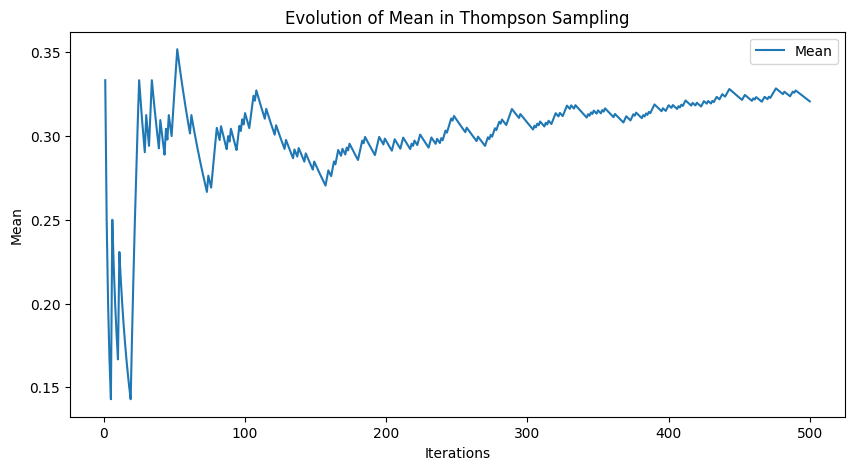

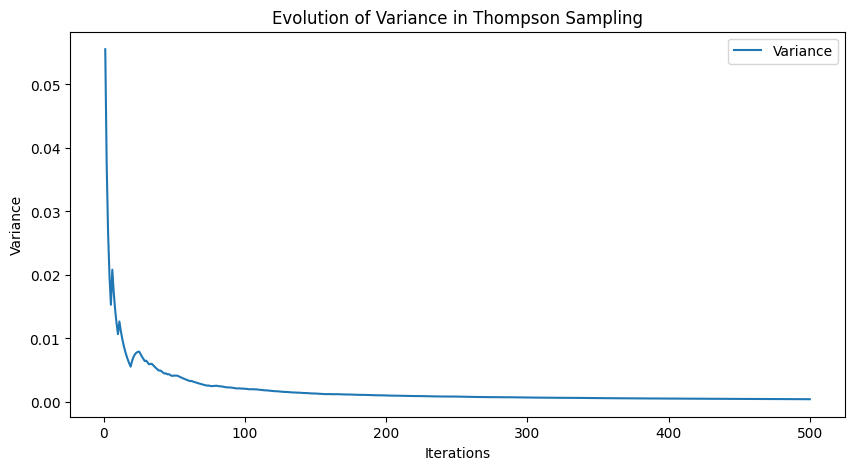

In [65]:
# Plot evolution of mean over time
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_iterations+1), mean_values, label='Mean')
plt.xlabel('Iterations')
plt.ylabel('Mean')
plt.title('Evolution of Mean in Thompson Sampling')
plt.legend()
plt.show()

# Plot evolution of variance over time
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_iterations+1), variance_values, label='Variance')
plt.xlabel('Iterations')
plt.ylabel('Variance')
plt.title('Evolution of Variance in Thompson Sampling')
plt.legend()
plt.show()

2.3 Thompson sampling for K-armed bandit Problem

In [66]:
import numpy as np


def thompson_sampling_arms(iterations):
    alpha = [1, 1, 1]
    beta = [1, 1, 1]
    cumulative_rewards = [0, 0, 0]  # Cumulative rewards for each arm
    
    for i in range(iterations):
        # Change range
        sampled_values = [np.random.beta(alpha[k], beta[k]) for k in range(3)]
        
        # Determine max sampled value
        k_max = np.argmax(sampled_values)
        
        # Simulate pulling the k_max arm and obtain reward
        reward = np.random.choice([0, 1], p=[1 - sampled_values[k_max], sampled_values[k_max]])
        
        # Update parameters based on observed reward for the k_max arm
        alpha[k_max] += reward
        beta[k_max] += 1 - reward
        
        # Update cumulative rewards for the chosen arm
        cumulative_rewards[k_max] += reward
    
    return cumulative_rewards

# Number of iterations
num_iterations = 1000

cumulative_rewards = thompson_sampling_arms(num_iterations)

# Display cumulative rewards for each arm
for k in range(3):
    print(f"Total reward for arm {k+1}: {cumulative_rewards[k]}")


Total reward for arm 1: 745
Total reward for arm 2: 230
Total reward for arm 3: 16


In [67]:

def thompson_sampling_K3(iterations):
    alpha = [1, 1, 1]
    beta = [1, 1, 1]
    cumulative_rewards = [0, 0, 0]
    total_reward = 0
    optimal_rewards = [0.5, 0.6, 0.7]

    regret = []

    for i in range(1, iterations + 1):
        sampled_values = [np.random.beta(alpha[k], beta[k]) for k in range(3)]
        k_max = np.argmax(sampled_values)

        reward = np.random.choice([0, 1], p=[1 - optimal_rewards[k_max], optimal_rewards[k_max]])

        alpha[k_max] += reward
        beta[k_max] += 1 - reward

        cumulative_rewards[k_max] += reward
        total_reward += reward

        instant_regret = max(optimal_rewards) - optimal_rewards[k_max]
        regret.append(instant_regret)

    return regret



In [68]:
# Change values of c
def ucb_K3(iterations, c):
    alpha = [0] * 3
    beta = [0] * 3
    counts = [0] * 3  # TODO check this
    cumulative_rewards = [0] * 3
    total_reward = 0
    optimal_rewards = [0.5, 0.6, 0.7] 

    regret = []

    for i in range(1, iterations + 1):
        if 0 in counts:
            k = counts.index(0)  # TODO - Change probably?????
        else:
            ucb_values = [alpha[k] / (alpha[k] + beta[k]) + c * np.sqrt(np.log(i) / counts[k]) for k in range(3)]
            k = np.argmax(ucb_values)

        reward = np.random.choice([0, 1], p=[1 - optimal_rewards[k], optimal_rewards[k]])

        alpha[k] += reward
        beta[k] += 1 - reward
        counts[k] += 1

        cumulative_rewards[k] += reward
        total_reward += reward

        instant_regret = max(optimal_rewards) - optimal_rewards[k]
        regret.append(instant_regret)

    return regret

In [69]:
# Number of iterations
num_iterations = 1000
num_runs = 100

# Perform Thompson Sampling for K=3 arms
ts_total_regret = np.zeros(num_iterations)
for run in range(num_runs):
    ts_regret = thompson_sampling_K3(num_iterations)
    ts_total_regret += np.cumsum(ts_regret)

# Calculate average regret for Thompson Sampling
ts_average_regret = ts_total_regret / num_runs

# Perform UCB for K=3 arms with different values of c
c_values = [0.5, 1, 2]
ucb_total_regret = {c: np.zeros(num_iterations) for c in c_values}

for c in c_values:
    for run in range(num_runs):
        ucb_regret = ucb_K3(num_iterations, c)
        ucb_total_regret[c] += np.cumsum(ucb_regret)

# Calculate average regret for UCB with different values of c
ucb_average_regret = {c: ucb_total_regret[c] / num_runs for c in c_values}

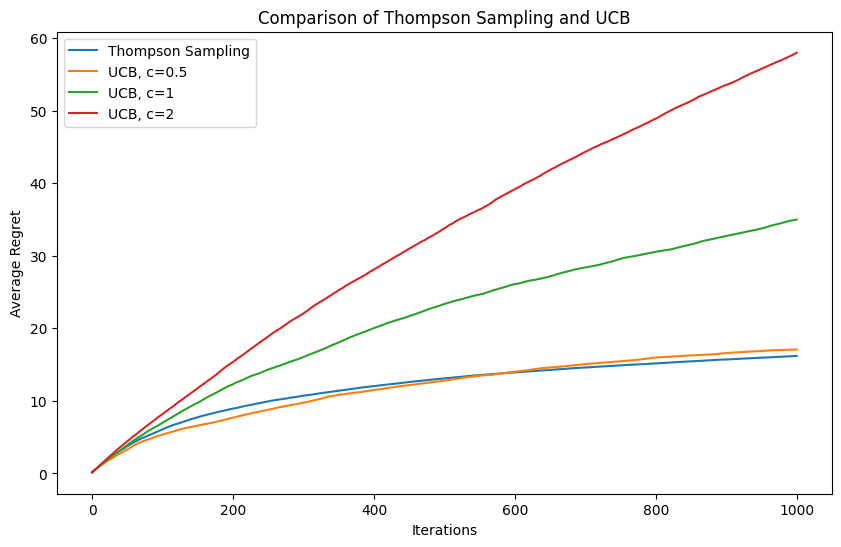

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(ts_average_regret, label='Thompson Sampling')
for c in c_values:
    plt.plot(ucb_average_regret[c], label=f'UCB, c={c}')
plt.xlabel('Iterations')
plt.ylabel('Average Regret')
plt.title('Comparison of Thompson Sampling and UCB')
plt.legend()
plt.show()

Reinforcement Learning: Cliff Walking

In [71]:
import random

# Constants
ROWS = 3
COLS = 21
START = (2, 0)
GOAL = (2, 20)
ACTIONS = ['UP', 'DOWN', 'LEFT', 'RIGHT']
EPSILON = 0.1
ALPHA = 0.5
GAMMA = 1.0
EPISODES = 500
REPLAY_BUFFER_SIZE = 100

# Initialize Q-values
q_values_sarsa = np.zeros((ROWS, COLS, len(ACTIONS)))
q_values_qlearning = np.zeros((ROWS, COLS, len(ACTIONS)))

# Helper function to choose action using epsilon-greedy policy
def epsilon_greedy_policy(q_values, state, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(len(ACTIONS))
    else:
        return np.argmax(q_values[state])

# SARSA algorithm
def sarsa():
    rewards_per_episode = []
    for episode in range(EPISODES):
        state = START
        action = epsilon_greedy_policy(q_values_sarsa, state, EPSILON)
        total_reward = 0

        while state != GOAL:
            next_state = state
            if ACTIONS[action] == 'UP':
                next_state = (max(state[0] - 1, 0), state[1])
            elif ACTIONS[action] == 'DOWN':
                next_state = (min(state[0] + 1, ROWS - 1), state[1])
            elif ACTIONS[action] == 'LEFT':
                next_state = (state[0], max(state[1] - 1, 0))
            elif ACTIONS[action] == 'RIGHT':
                next_state = (state[0], min(state[1] + 1, COLS - 1))

            reward = -1
            if next_state[0] == 2 and 1 <= next_state[1] <= 18:  # Cliff region
                reward = -100

            next_action = epsilon_greedy_policy(q_values_sarsa, next_state, EPSILON)
            q_values_sarsa[state][action] += ALPHA * (reward + GAMMA * q_values_sarsa[next_state][next_action] - q_values_sarsa[state][action])
            state = next_state
            action = next_action
            total_reward += reward

        rewards_per_episode.append(total_reward)
    
    return rewards_per_episode

def q_learning_without_replay():
    rewards_per_episode = []

    for episode in range(EPISODES):
        state = START
        total_reward = 0

        while state != GOAL:
            action = epsilon_greedy_policy(q_values_qlearning, state, EPSILON)
            next_state = state
            if ACTIONS[action] == 'UP':
                next_state = (max(state[0] - 1, 0), state[1])
            elif ACTIONS[action] == 'DOWN':
                next_state = (min(state[0] + 1, ROWS - 1), state[1])
            elif ACTIONS[action] == 'LEFT':
                next_state = (state[0], max(state[1] - 1, 0))
            elif ACTIONS[action] == 'RIGHT':
                next_state = (state[0], min(state[1] + 1, COLS - 1))

            reward = -1
            if next_state[0] == 2 and 1 <= next_state[1] <= 18:  # Cliff region
                reward = -100

            q_values_qlearning[state][action] += ALPHA * (
                    reward + GAMMA * np.max(q_values_qlearning[next_state]) - q_values_qlearning[state][action])
            
            state = next_state
            total_reward += reward

        rewards_per_episode.append(total_reward)

    return rewards_per_episode

# Q-learning algorithm with replay buffer
def q_learning():
    rewards_per_episode = []
    replay_buffer = []

    for episode in range(EPISODES):
        state = START
        total_reward = 0

        while state != GOAL:
            action = epsilon_greedy_policy(q_values_qlearning, state, EPSILON)
            next_state = state
            if ACTIONS[action] == 'UP':
                next_state = (max(state[0] - 1, 0), state[1])
            elif ACTIONS[action] == 'DOWN':
                next_state = (min(state[0] + 1, ROWS - 1), state[1])
            elif ACTIONS[action] == 'LEFT':
                next_state = (state[0], max(state[1] - 1, 0))
            elif ACTIONS[action] == 'RIGHT':
                next_state = (state[0], min(state[1] + 1, COLS - 1))

            reward = -1
            if next_state[0] == 2 and 1 <= next_state[1] <= 18:  # Cliff region
                reward = -100

            replay_buffer.append((state, action, reward, next_state))
            if len(replay_buffer) > REPLAY_BUFFER_SIZE:
                replay_buffer.pop(0)

            # Q-learning update
            sample = random.choice(replay_buffer)
            q_values_qlearning[sample[0]][sample[1]] += ALPHA * (
                    sample[2] + GAMMA * np.max(q_values_qlearning[sample[3]]) - q_values_qlearning[sample[0]][sample[1]])
            
            state = next_state
            total_reward += reward

        rewards_per_episode.append(total_reward)

    return rewards_per_episode



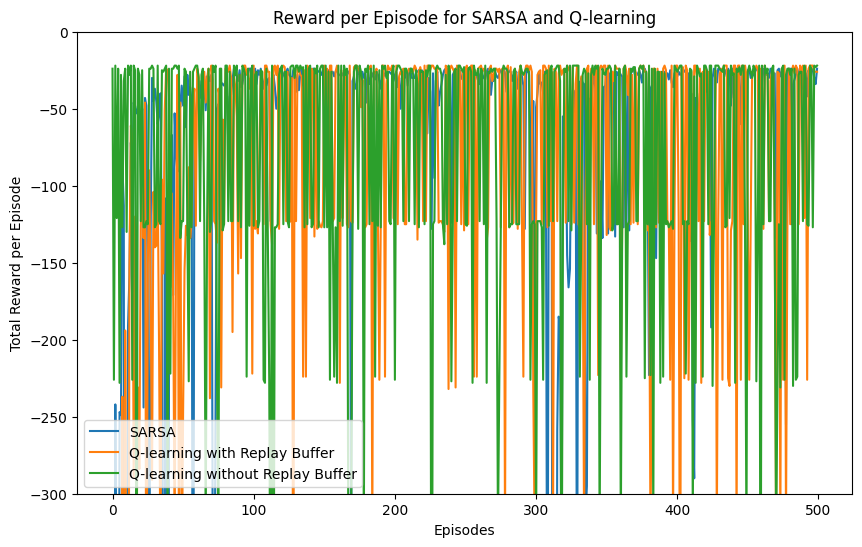

In [72]:
# Run SARSA and Q-learning without replay buffer
rewards_sarsa = sarsa()
rewards_qlearning = q_learning()
rewards_qlearning_without_replay = q_learning_without_replay()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.arange(EPISODES), rewards_sarsa, label='SARSA')
plt.plot(np.arange(EPISODES), rewards_qlearning, label='Q-learning with Replay Buffer')
plt.plot(np.arange(EPISODES), rewards_qlearning_without_replay, label='Q-learning without Replay Buffer')
plt.xlabel('Episodes')
plt.ylabel('Total Reward per Episode')
plt.title('Reward per Episode for SARSA and Q-learning')
plt.legend()
plt.ylim(-300, 0)
plt.show()

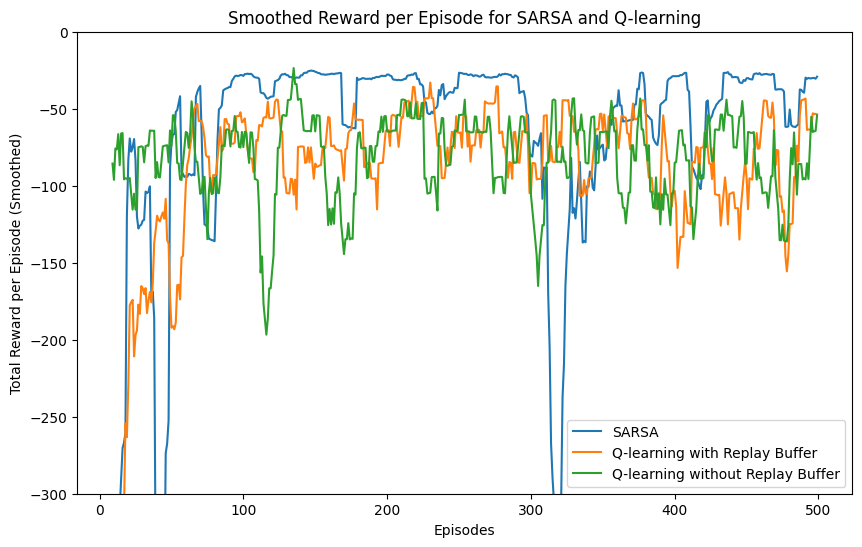

In [73]:
# Function for calculating moving average
def moving_average(data, window_size):
    cumsum = np.cumsum(data)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

# Smoothing window size
window_size = 10

# Calculate moving average for SARSA rewards
smoothed_rewards_sarsa = moving_average(rewards_sarsa, window_size)

# Calculate moving average for Q-learning rewards
smoothed_rewards_qlearning = moving_average(rewards_qlearning, window_size)

# Calculate moving average for SARSA rewards without replay buffer
smoothed_rewards_qlearning_without_replay = moving_average(rewards_qlearning_without_replay, window_size)

# Plotting smoothed reward per episode for all methods
plt.figure(figsize=(10, 6))
plt.plot(np.arange(window_size - 1, EPISODES), smoothed_rewards_sarsa, label='SARSA')
plt.plot(np.arange(window_size - 1, EPISODES), smoothed_rewards_qlearning, label='Q-learning with Replay Buffer')
plt.plot(np.arange(window_size - 1, EPISODES), smoothed_rewards_qlearning_without_replay, label='Q-learning without Replay Buffer')
plt.xlabel('Episodes')
plt.ylabel('Total Reward per Episode (Smoothed)')
plt.title('Smoothed Reward per Episode for SARSA and Q-learning')
plt.legend()
plt.ylim(-300, 0)
plt.show()


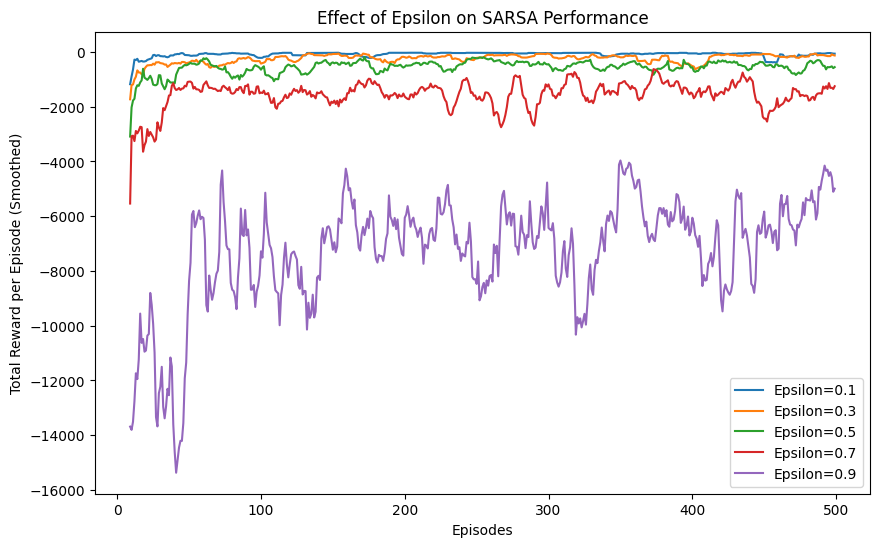

In [74]:
def run_sarsa_for_epsilon(epsilon):
    q_values_sarsa = np.zeros((ROWS, COLS, len(ACTIONS)))
    rewards_per_episode = []

    for episode in range(EPISODES):
        state = START
        action = epsilon_greedy_policy(q_values_sarsa, state, epsilon)
        total_reward = 0

        while state != GOAL:
            next_state = state
            if ACTIONS[action] == 'UP':
                next_state = (max(state[0] - 1, 0), state[1])
            elif ACTIONS[action] == 'DOWN':
                next_state = (min(state[0] + 1, ROWS - 1), state[1])
            elif ACTIONS[action] == 'LEFT':
                next_state = (state[0], max(state[1] - 1, 0))
            elif ACTIONS[action] == 'RIGHT':
                next_state = (state[0], min(state[1] + 1, COLS - 1))

            reward = -1
            if next_state[0] == 2 and 1 <= next_state[1] <= 18:  # Cliff region
                reward = -100

            next_action = epsilon_greedy_policy(q_values_sarsa, next_state, epsilon)
            q_values_sarsa[state][action] += ALPHA * (
                    reward + GAMMA * q_values_sarsa[next_state][next_action] - q_values_sarsa[state][action])
            
            state = next_state
            action = next_action
            total_reward += reward

        rewards_per_episode.append(total_reward)

    return moving_average(rewards_per_episode, window_size)

# Experiment with different values of epsilon
epsilons = [0.1, 0.3, 0.5, 0.7, 0.9]
smoothed_rewards = []

for epsilon in epsilons:
    smoothed_rewards.append(run_sarsa_for_epsilon(epsilon))

# Plotting
plt.figure(figsize=(10, 6))
for i, epsilon in enumerate(epsilons):
    plt.plot(np.arange(window_size - 1, EPISODES), smoothed_rewards[i], label=f'Epsilon={epsilon}')

plt.xlabel('Episodes')
plt.ylabel('Total Reward per Episode (Smoothed)')
plt.title('Effect of Epsilon on SARSA Performance')
plt.legend()
plt.show()


In [75]:
def run_sarsa_with_snake_pits():
    q_values_sarsa = np.zeros((ROWS, COLS, len(ACTIONS)))
    rewards_per_episode = []

    for episode in range(EPISODES):
        state = START
        action = epsilon_greedy_policy(q_values_sarsa, state, EPSILON)
        total_reward = 0

        while state != GOAL:
            next_state = state
            if ACTIONS[action] == 'UP':
                next_state = (max(state[0] - 1, 0), state[1])
            elif ACTIONS[action] == 'DOWN':
                next_state = (min(state[0] + 1, ROWS - 1), state[1])
            elif ACTIONS[action] == 'LEFT':
                next_state = (state[0], max(state[1] - 1, 0))
            elif ACTIONS[action] == 'RIGHT':
                next_state = (state[0], min(state[1] + 1, COLS - 1))

            reward = -1
            # Handling the cliff and snake pits
            if next_state[0] == 2 and 1 <= next_state[1] <= 18:  # Cliff region
                reward = -100
            elif next_state[0] == 2 and next_state[1] in (10, 11):  # Snake pits
                reward = -100

            next_action = epsilon_greedy_policy(q_values_sarsa, next_state, EPSILON)
            q_values_sarsa[state][action] += ALPHA * (
                    reward + GAMMA * q_values_sarsa[next_state][next_action] - q_values_sarsa[state][action])
            
            state = next_state
            action = next_action
            total_reward += reward

        rewards_per_episode.append(total_reward)

    return moving_average(rewards_per_episode, window_size)

# Function to run Q-learning with snake pits
def run_q_learning_with_snake_pits():
    q_values_qlearning = np.zeros((ROWS, COLS, len(ACTIONS)))
    rewards_per_episode = []

    for episode in range(EPISODES):
        state = START
        total_reward = 0

        while state != GOAL:
            action = epsilon_greedy_policy(q_values_qlearning, state, EPSILON)
            next_state = state
            if ACTIONS[action] == 'UP':
                next_state = (max(state[0] - 1, 0), state[1])
            elif ACTIONS[action] == 'DOWN':
                next_state = (min(state[0] + 1, ROWS - 1), state[1])
            elif ACTIONS[action] == 'LEFT':
                next_state = (state[0], max(state[1] - 1, 0))
            elif ACTIONS[action] == 'RIGHT':
                next_state = (state[0], min(state[1] + 1, COLS - 1))

            reward = -1
            # Handling the cliff and snake pits
            if next_state[0] == 2 and 1 <= next_state[1] <= 18:  # Cliff region
                reward = -100
            elif next_state[0] == 2 and next_state[1] in (10, 11):  # Snake pits
                reward = -100

            q_values_qlearning[state][action] += ALPHA * (
                    reward + GAMMA * np.max(q_values_qlearning[next_state]) - q_values_qlearning[state][action])
            
            state = next_state
            total_reward += reward

        rewards_per_episode.append(total_reward)

    return moving_average(rewards_per_episode, window_size)




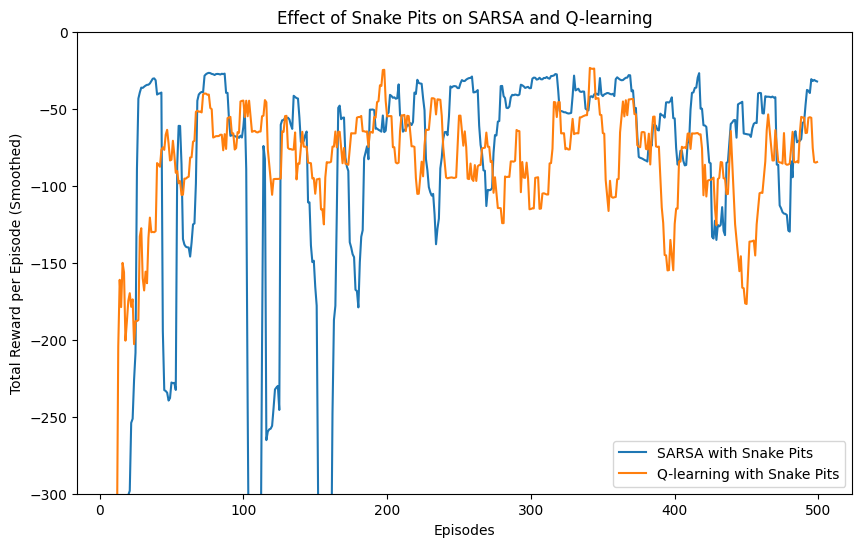

In [76]:
# Run SARSA and Q-learning with snake pits
smoothed_rewards_sarsa_with_snakes = run_sarsa_with_snake_pits()
smoothed_rewards_qlearning_with_snakes = run_q_learning_with_snake_pits()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.arange(window_size - 1, EPISODES), smoothed_rewards_sarsa_with_snakes, label='SARSA with Snake Pits')
plt.plot(np.arange(window_size - 1, EPISODES), smoothed_rewards_qlearning_with_snakes, label='Q-learning with Snake Pits')
plt.xlabel('Episodes')
plt.ylabel('Total Reward per Episode (Smoothed)')
plt.title('Effect of Snake Pits on SARSA and Q-learning')
plt.legend()
plt.ylim(-300,0)
plt.show()